<img src="../../predictioNN_Logo_JPG(72).jpg" width=200>

---

## Visualization
### Introduction to Data Science
### Last Updated: January 8, 2023
---  

### PREREQUISITES
- variables
- data types
- pandas

### SOURCES 
- https://matplotlib.org/
- https://seaborn.pydata.org/

### OBJECTIVES
- Understand how to build appropriate plots to clearly communicate information in your data
- Understand how data must be formatted for plotting
- Apply basic functionality of the `matplotlib` package
- Apply basic functionality of the `seaborn` package
- Create complex plots
- Save plots to a file


### CONCEPTS
- the right plot clearly communicates information; the wrong plot confuses and possibly misleads
- you need to get data into the right format to visualize it with packages
- various visualization types
- adding layers to figures
- knowing the basic functionality allows you to look up specific code to make plots

---

### I. Visualization

Good visualizations of your data will help with understanding patterns and telling a story.  

Bad visualization of your data can make for an unclear story, or worse: it can tell a misleading, incorrect story.

This notebook will teach you how to:

- select the right visualization for your data
- format your data for plotting with visualization packages
- use Python packages `matplotlib` and `seaborn` to make plots

It won't be necessary to memorize all of the plotting commands. The important thing is to understand the essentials.  
You can rely on documentation for customization.

Load packages and import some data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### II. Selecting the Right Plot

**A. First Grade Class**

We start by loading some data which shows student ages for a first grade class.  
We would like to communicate the number of students with each age.

In [13]:
df = pd.read_csv('../datasets/first_grade_class_ages.csv')
df

,studentid,age
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6
5,6,6
6,7,6
7,8,6
8,9,6
9,10,6


Each student has an identifier named `studentid` and the student's `age`.  

**1a. Bad Example of Student Age Data: Line Plot**

unique ages: [6 7]


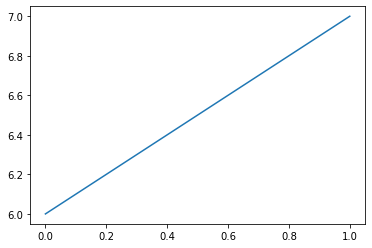

In [14]:
ages = np.unique(df.age)
print('unique ages:', ages)
plt.plot(ages)
plt.show()

---

**THINK ABOUT AND DISCUSS**

Why is this a bad plot?

answer:  

- we cannot tell how many students are of each age
- the plot shows a fictional relationship with the x-axis and the y-axis
- the line plot does not convey any useful information

---

Bad plots:

- show relationships that don't exist
- show incorrect information
- confuse the viewer
- include dimensions that don't exist:
  - showing bars of different colors, when the colors have no meaning
  - showing a third dimension like depth, when the third dimension has no meaning

**1b. Better Example of Student Age Data: Histogram**

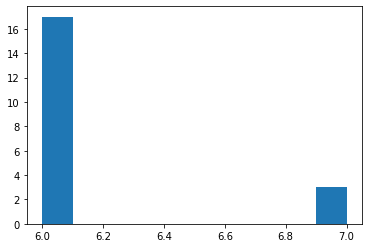

In [15]:
plt.hist(df.age)
plt.show()

This histogram is a better way to show the data, however **axes should be labeled to communicate this information**.

**1c. Even Better Example of Student Age Data**

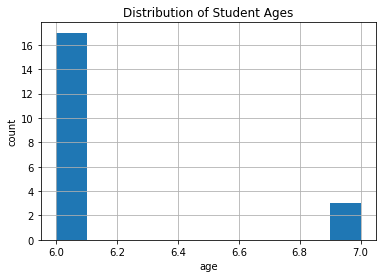

In [16]:
plt.hist(df.age)
plt.title('Distribution of Student Ages')
plt.xlabel('age')
plt.ylabel('count')
plt.grid()
plt.show()

This graph includes a title, gridlines, an x-axis label and a y-axis label.  
It makes the data much clearer to the viewer. 

- The graph shows the number of students in each age bin 
- We can see that most students (17) are the [6-6.1) age bin.  
- We can better understand the data range: there are no students younger than 6 or older than 7.
- There are no false relationships or dimensions


---

**THINK ABOUT AND DISCUSS**

Do you see any issues with this plot?

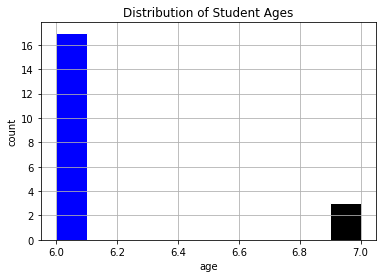

In [17]:
N, bins, patches = plt.hist(df.age, edgecolor='white', linewidth=1)

for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,5):    
    patches[i].set_facecolor('r')
for i in range(5, len(patches)):
    patches[i].set_facecolor('black')
    
plt.title('Distribution of Student Ages')
plt.xlabel('age')
plt.ylabel('count')
plt.grid()
plt.show()

answer:

The different colored bars are unnecessary. They convey additional information that doesn't exist.

---

**B. Amazon Stock Price**

Next, we look at daily Amazon stock price data from Yahoo! Finance. Let's focus on `Date` and `Adj Close`.  
Adjusted close is the price adjusted for splits and dividends.

In [18]:
amzn = pd.read_csv('../datasets/AMZN_monthly.csv')
amzn.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-01,164.450500,173.949997,158.812500,168.621506,168.621506,1273466000
1,2021-11-01,168.089996,188.107498,164.177505,175.353500,175.353500,1515990000
2,2021-12-01,177.250000,177.994003,165.195007,166.716995,166.716995,1287634000


If we want to understand the adjusted close over time, this histogram wouldn't do a good job:

**2a. Bad Example of Amazon Stock Price Data: Histogram**

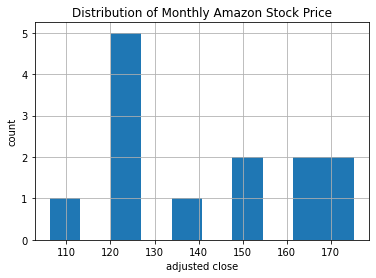

In [19]:
plt.hist(amzn['Adj Close'])
plt.title('Distribution of Monthly Amazon Stock Price')
plt.xlabel('adjusted close')
plt.ylabel('count')
plt.grid()
plt.show()

Why isn't this a good plot? It is a perfectly good histogram, but it is the wrong tool for the job:  
It is ignoring the time dimension of the data. We need a plot that shows the time series.  

**2b. Good Example of Amazon Stock Price Data: Line Plot**

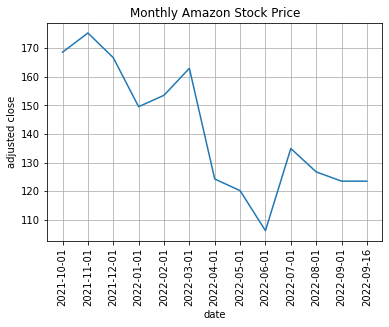

In [20]:
plt.plot(amzn['Date'], amzn['Adj Close'])
plt.title('Monthly Amazon Stock Price')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('adjusted close')
plt.grid()
plt.show()

This chart clearly communicates how the price changes over time. We can quickly find the stock price high, low, and current value.

In fact, if you wanted to a more detailed view of this data, you could create a *candlestick chart* which is a specific visualization for price data.

**Takeaways**

We showed some examples of plots, and there are many more.

As you create visuals of your data, ask yourself:

- is this clearly communicating the information?
- is there anything misleading or incorrect?
- could I better label the figure?
- would there be a better way to show this data?

### III. Data Layout for Plotting

Data needs to be organized in a specific way (called *tidy*) for it to be plotted:

- the different variables are arranged as columns
- the observations are along the rows
- the measurements populate the cells

This layout will enable graphing.

---

**Wine Quality Dataset**

Next, we import a wine quality dataset from the UC Irvine Machine Learning database.  
Note the separator ; or the data doesn't parse into columns.

In [21]:
df = pd.read_csv('../datasets/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


This data is structured in the tidy form and it is ready for plotting:

- the different variables are arranged as columns -> pH, density, ... are on the columns
- the observations are along the rows  -> the different wines are on the rows
- the measurements populate the cells -> the table is populated with measurements

### IV. Matplotlib Intro

You have seen some `matplotlib` code examples above; now we will dive in further.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Below are some quick examples. The first is a **scatterplot**, which takes two variables and plots their paired values.

The scatterplot is useful for understanding how two variables co-vary. Specifically, this can be helpful for modeling.

You can add layers such as title, legend, etc.

See documentation for more details and examples.


**Example 1**: Scatterplot

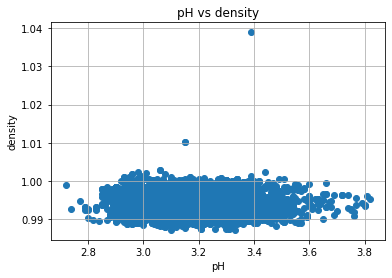

In [22]:
plt.scatter(df.pH, df.density)
plt.title('pH vs density')
plt.xlabel('pH') 
plt.ylabel('density') 
plt.grid()

This scatterplot shows that for various pH levels, the density is generally in the same range. There is not a strong association between pH and density.

Small modifications produce this **histogram**, which plots one variable.  
It gives a good understanding of how the data is distributed.

**Example 2**: Histogram

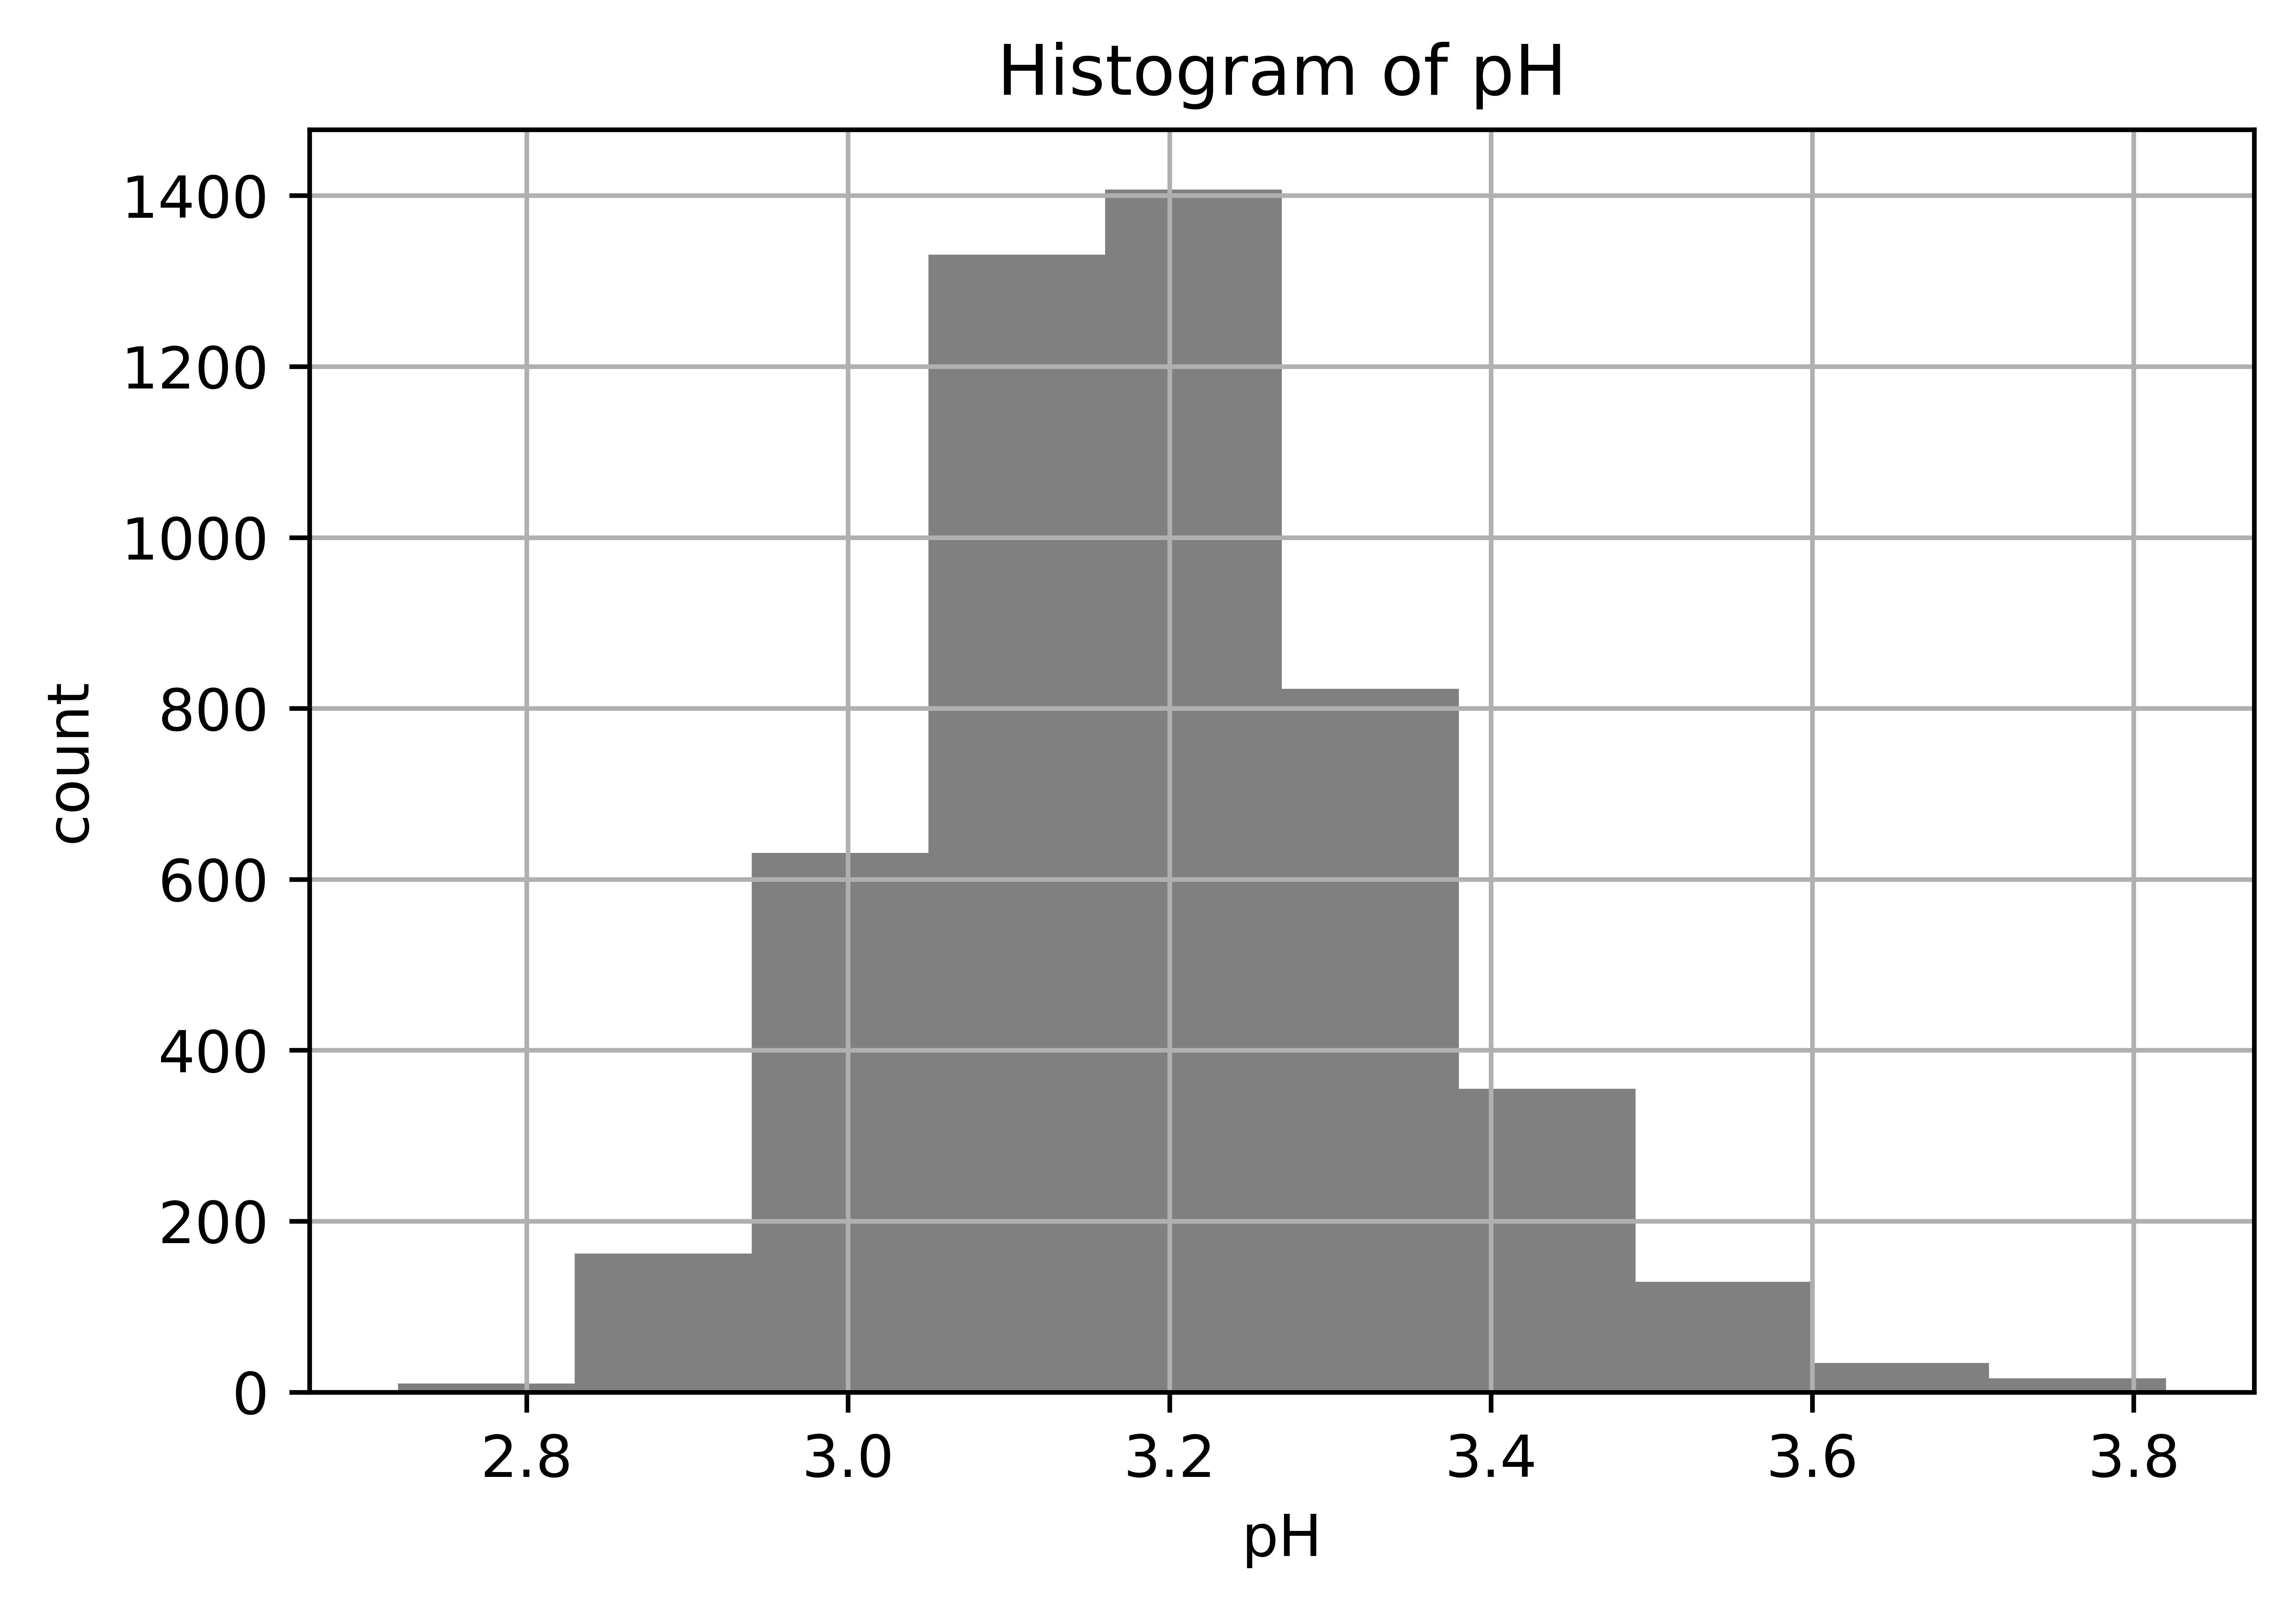

In [23]:
plt.figure(dpi=1200) 
plt.hist(df.pH, color='grey')
plt.title('Histogram of pH')
plt.xlabel('pH') 
plt.ylabel('count')
plt.grid()

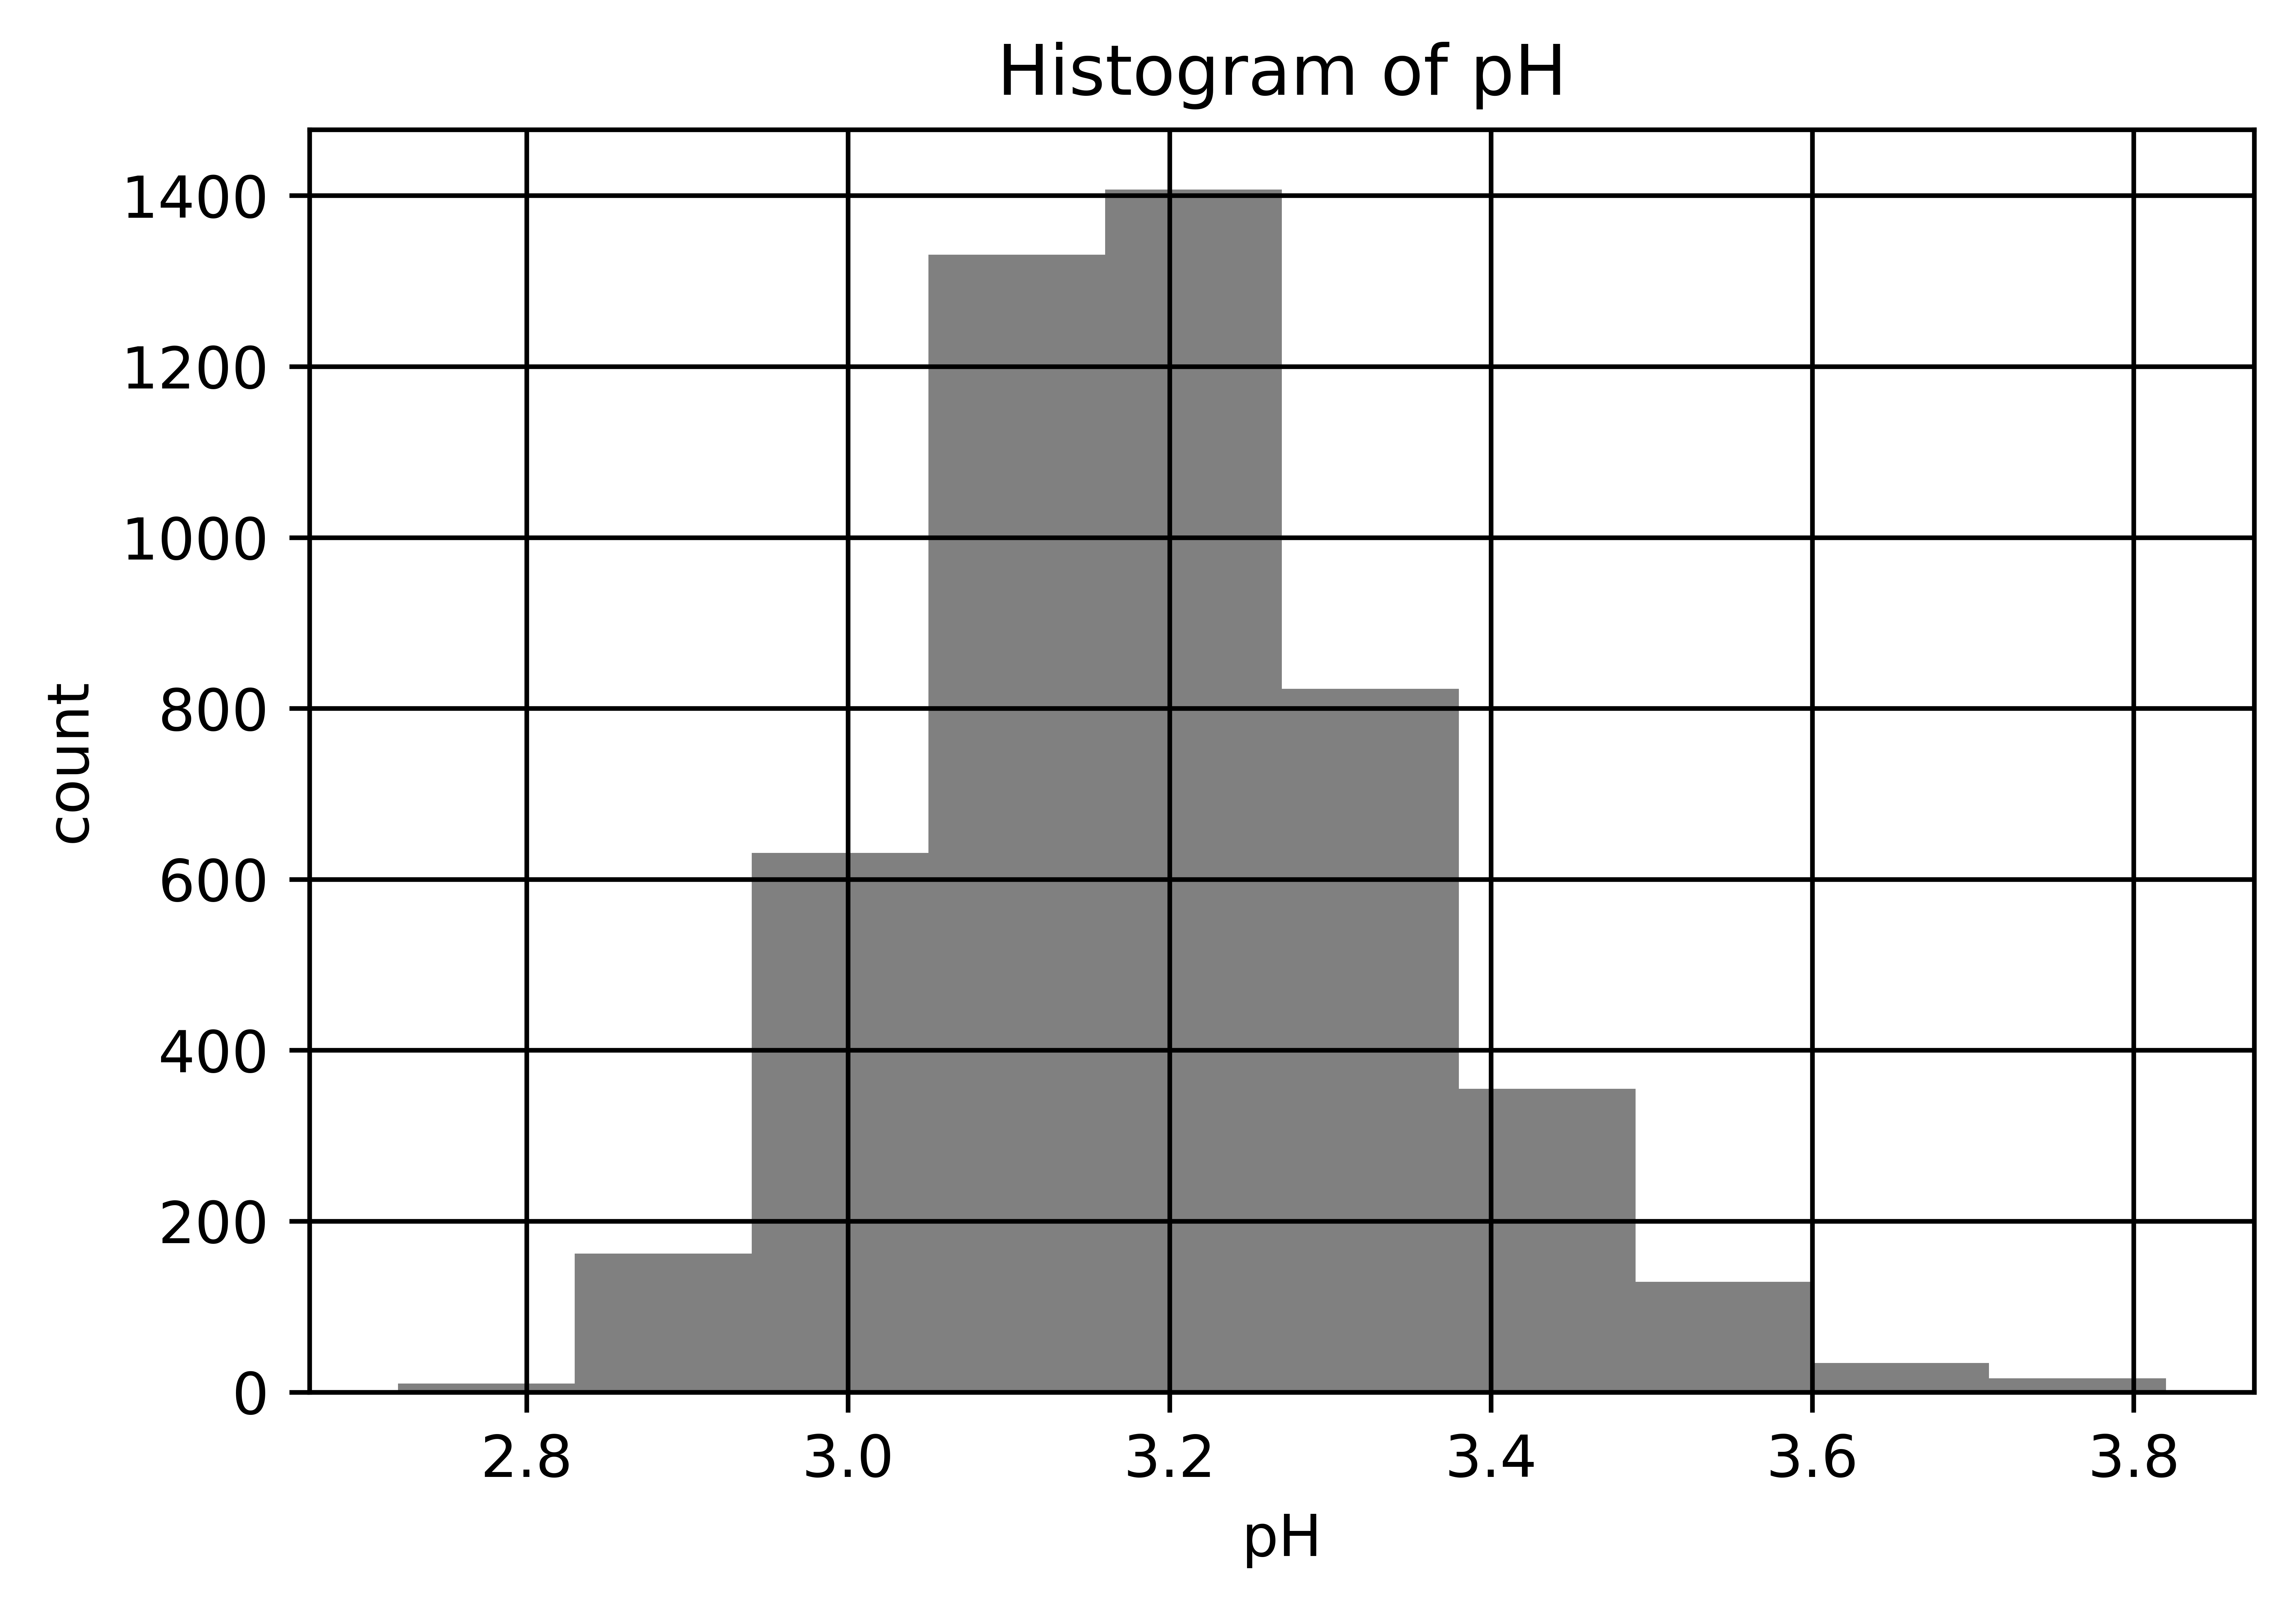

In [31]:
plt.figure(dpi=1200) 
plt.hist(df.pH, color='grey')
plt.title('Histogram of pH')
plt.xlabel('pH') 
plt.ylabel('count')
plt.grid(color='black')

**Example 3**: Line plot w synthetic data

We might want to save a figure, and this can be done with the `savefig()` method.  
This example saves the figure to a png file.

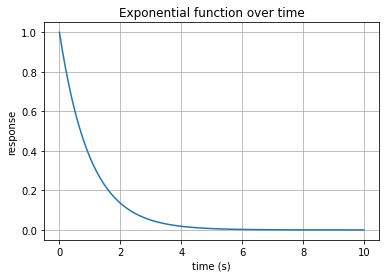

In [25]:
# Data for plotting
t = np.arange(0.0, 10.0, 0.01)
exp_fn = 1 / np.exp(t)

fig, ax = plt.subplots()
ax.plot(t, exp_fn)

ax.set(xlabel='time (s)', ylabel='response',
       title='Exponential function over time')
ax.grid()

fig.savefig("test.png")

**Example 4**: Several lineplots at once

`plt.subplot(nrows, ncols, index)` allows you to create several figures at once.

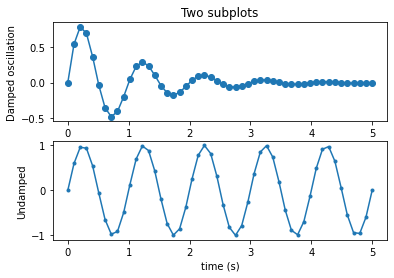

In [26]:
# generate some data
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 5.0)

y1 = np.sin(2 * np.pi * x1) * np.exp(-x1)
y2 = np.sin(2 * np.pi * x2)

# two rows, one column, first figure
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Two subplots') # this is main title of figures
plt.ylabel('Damped oscillation')

# two rows, one column, second figure
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()

---

#### TRY FOR YOURSELF
Do the following:

- Use `matplotlib` to create your own visualizations based on the wine data
- Challenge: Given response variable y and a list of X variables, write a loop that builds graphs of y versus each x in X.  
  Hint: include `plt.show()` after each graph to show them all together.

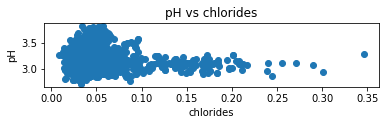

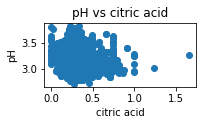

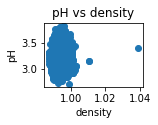

In [7]:
y = df.pH
X = ['chlorides','citric acid','density']

nrows = len(X)

for row in range(nrows):
    plt.subplot(nrows, row+1, 1)
    plt.scatter(df[X[row]], y)
    plt.title('pH vs {}'.format(X[row]))
    plt.xlabel(X[row]) 
    plt.ylabel('pH') 
    plt.show()


---  

### V. Seaborn Intro

Seaborn is a nice visualization library based on matplotlib.  
The graphs can be visually appealing.

For some functionality, such as adding layers to a seaborn plot, you will use matplotlib commands.

In [10]:
import seaborn as sns

**Example 5**: Revisit scatterplot

Notice how parameters `data`, `x`, and `y` are used. Their order does not matter.

<AxesSubplot:xlabel='pH', ylabel='density'>

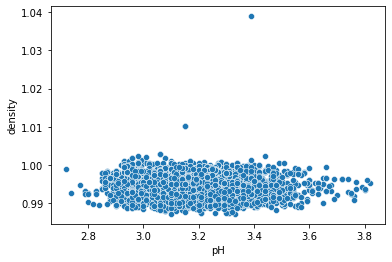

In [27]:
sns.scatterplot(x="pH", y="density", data=df)

Changing the type of plot is straightforward: change the function name, while keeping parameters the same.

**Example 6**: Jointplot of data

This builds the (bivariate) scatterplot and (univariate) histograms for each variable so the viewer can:

- understand how two variables co-vary
- understand the distribution of each of the individual variables

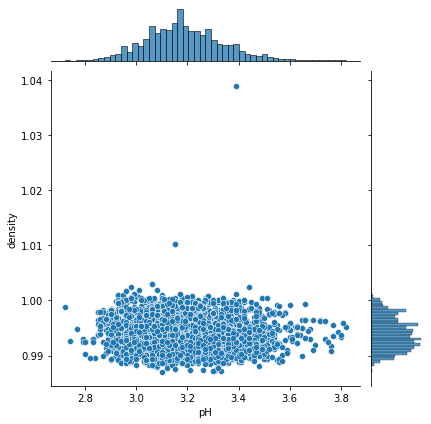

In [28]:
sns.jointplot(x="pH", y="density", data=df)

**Example 7**: Jointplot, adding regression fit and changing color.

`kind="reg"` adds the regression functionality

The regression line shows the linear association between the two variables.

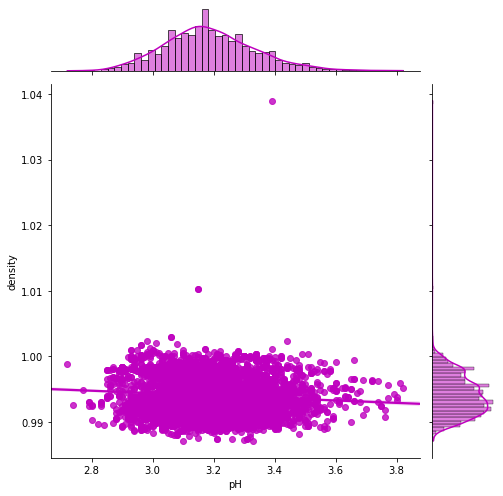

In [29]:
sns.jointplot(x="pH", y="density", data=df, 
              kind="reg", truncate=False,
              color="m", height=7)

**Example 8**: Revisit the scatterplot, adding title.  
Notice: this uses functionality from `matplotlib`

Text(0.5, 1.0, 'Density vs pH')

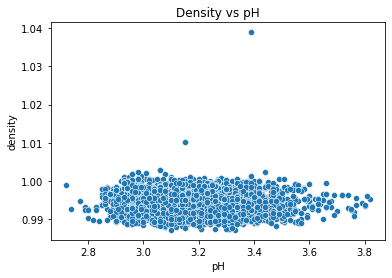

In [30]:
sns.scatterplot(x="pH", y="density", data=df)
plt.title('Density vs pH') # call the .title() method from matplotlib's plt

---

#### TRY FOR YOURSELF
Do the following:

- Use `seaborn` to create your own visualizations based on the wine data. Add a title.

---

### VI. Summary

In this notebook you learned:

- how to select and build the right plot to communicate information about data
- different examples of plots for communicating information with different kinds of data
- data should be structured in the *tidy* form for easy visualization
- how to make plots in `matplotlib`
- how to make plots in `seaborn`

---

### Appendix: Additional Plots

A small dataset with some simple plots to show how easy it is to mislead.

<AxesSubplot:>

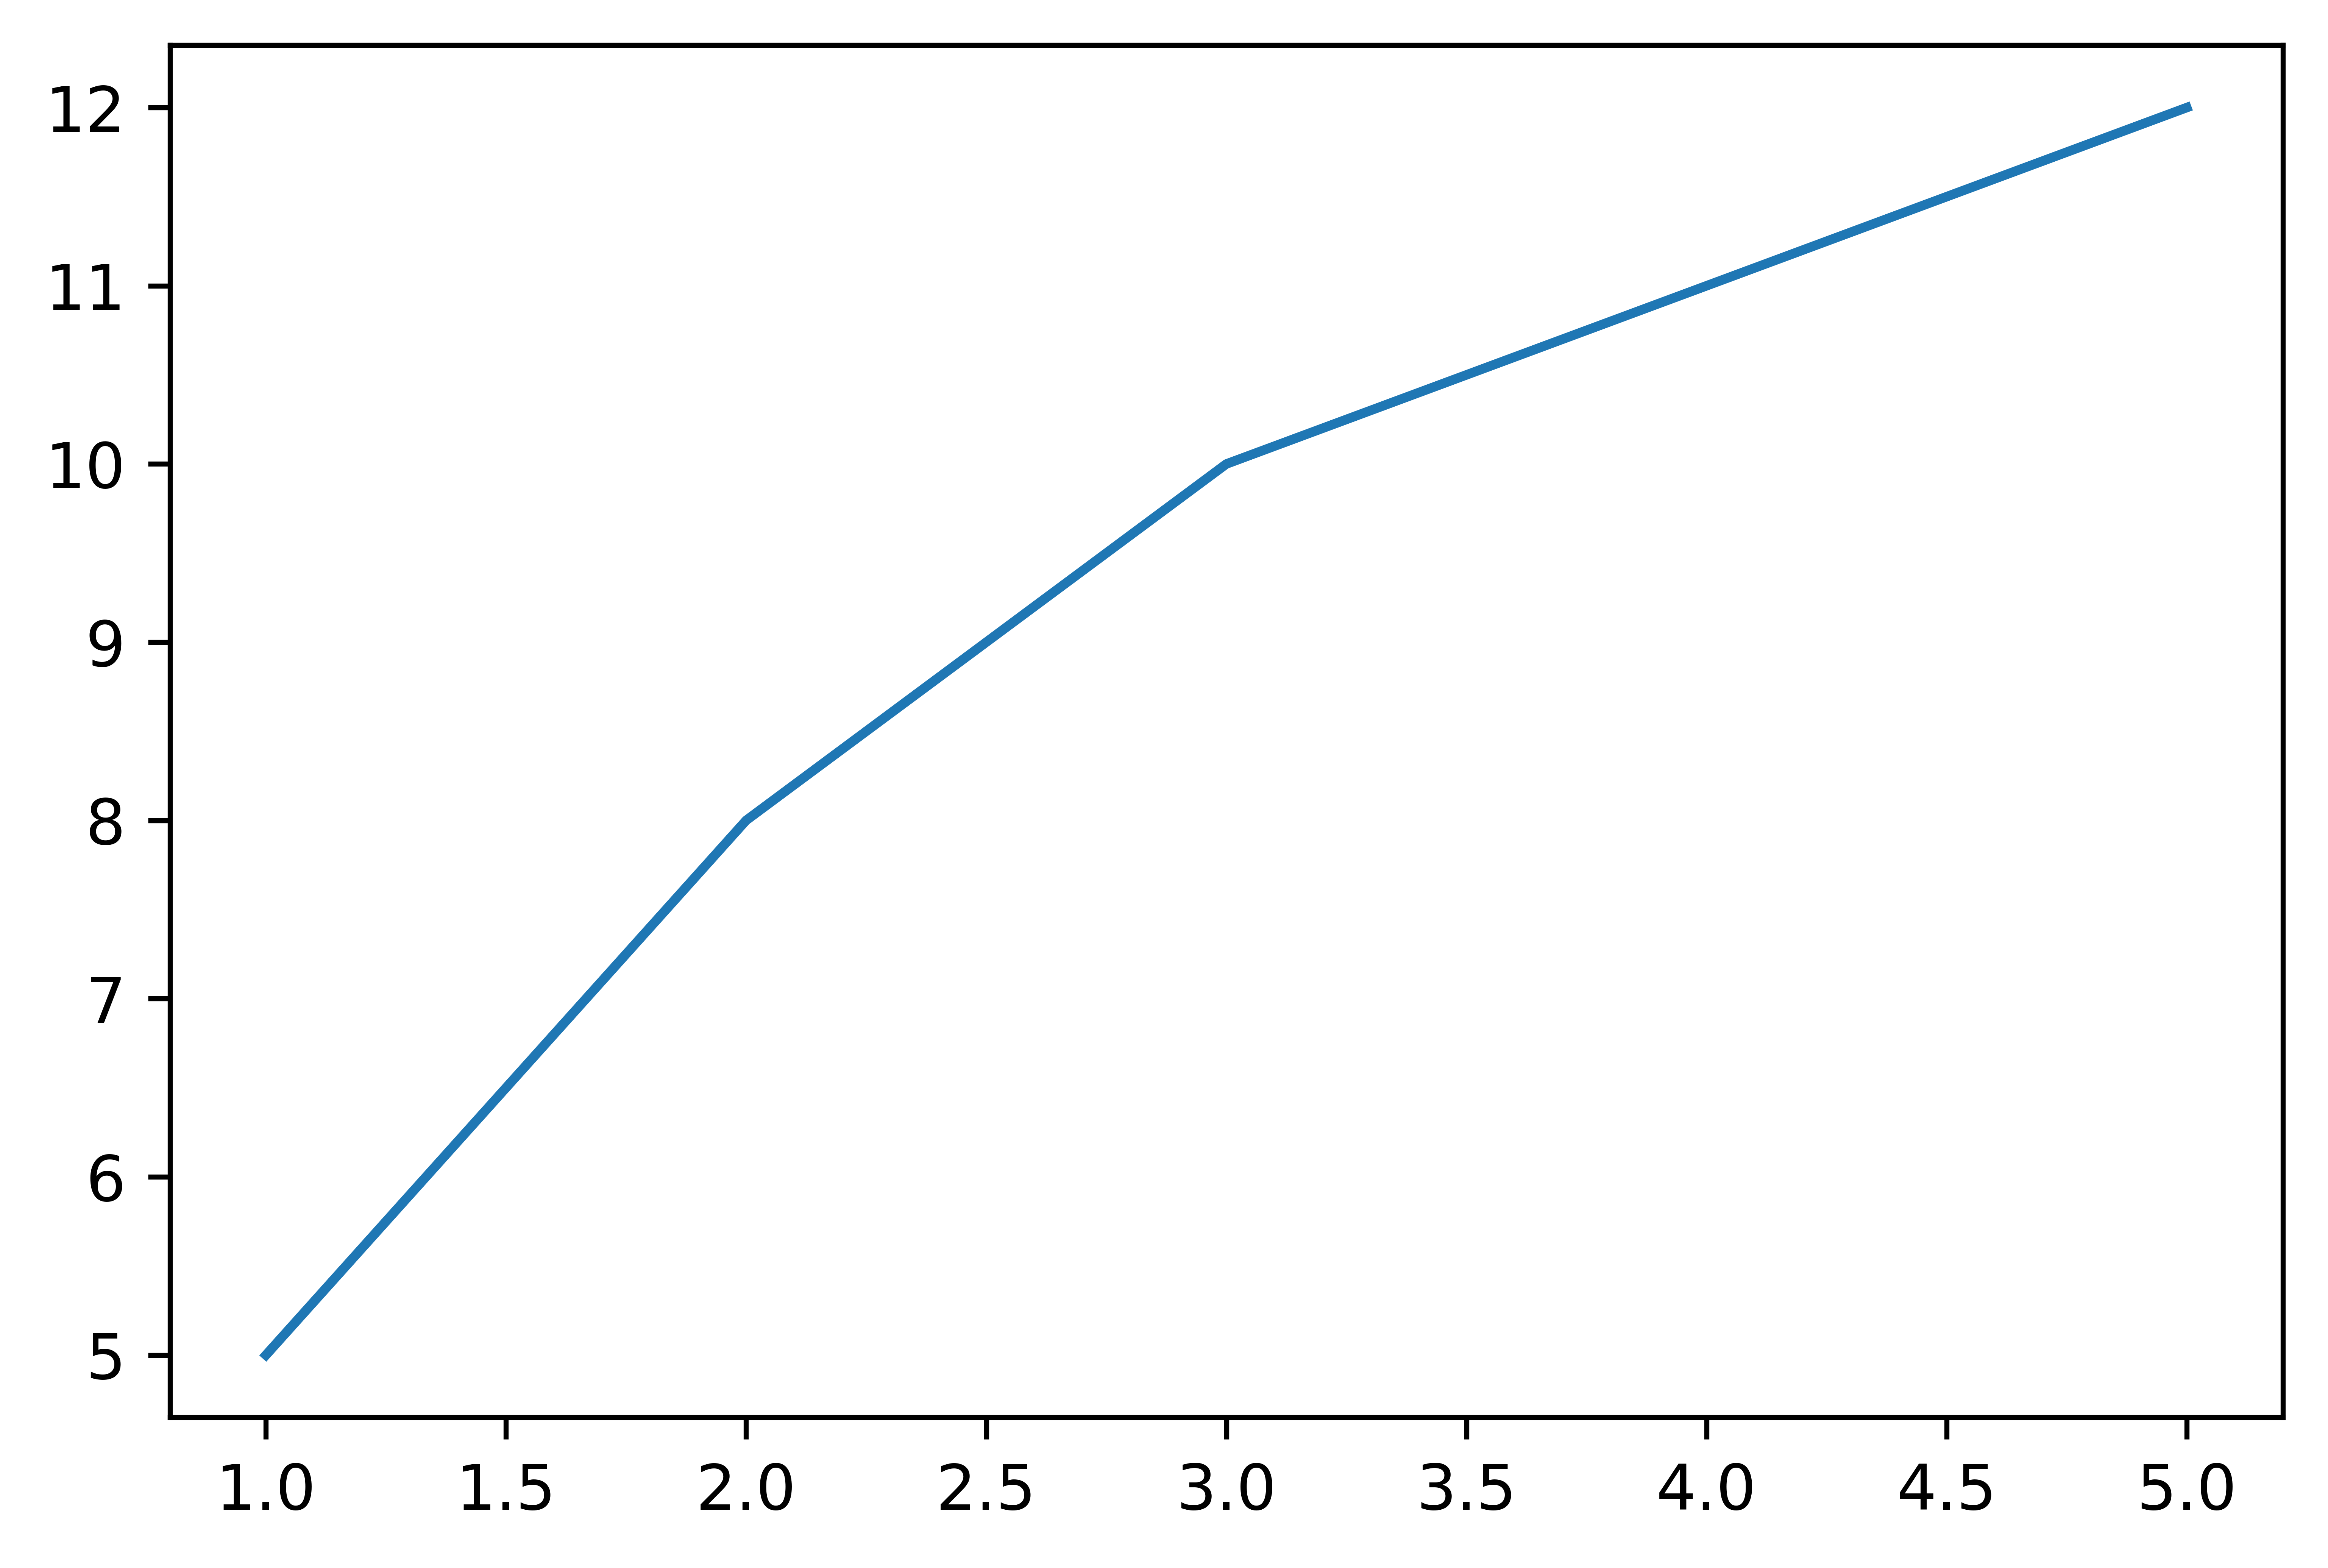

In [33]:
plt.figure(dpi=1200) 
xval = [1, 2, 3, 5]
yval = [ 5, 8, 10, 12]
sns.lineplot(x=xval,y=yval)

Even this simple graphic is highly misleading, as the curve uses interpolation to invent new data points.

We would be better off with a scatter plot.

We also need to be careful when creating bar charts.

<AxesSubplot:>

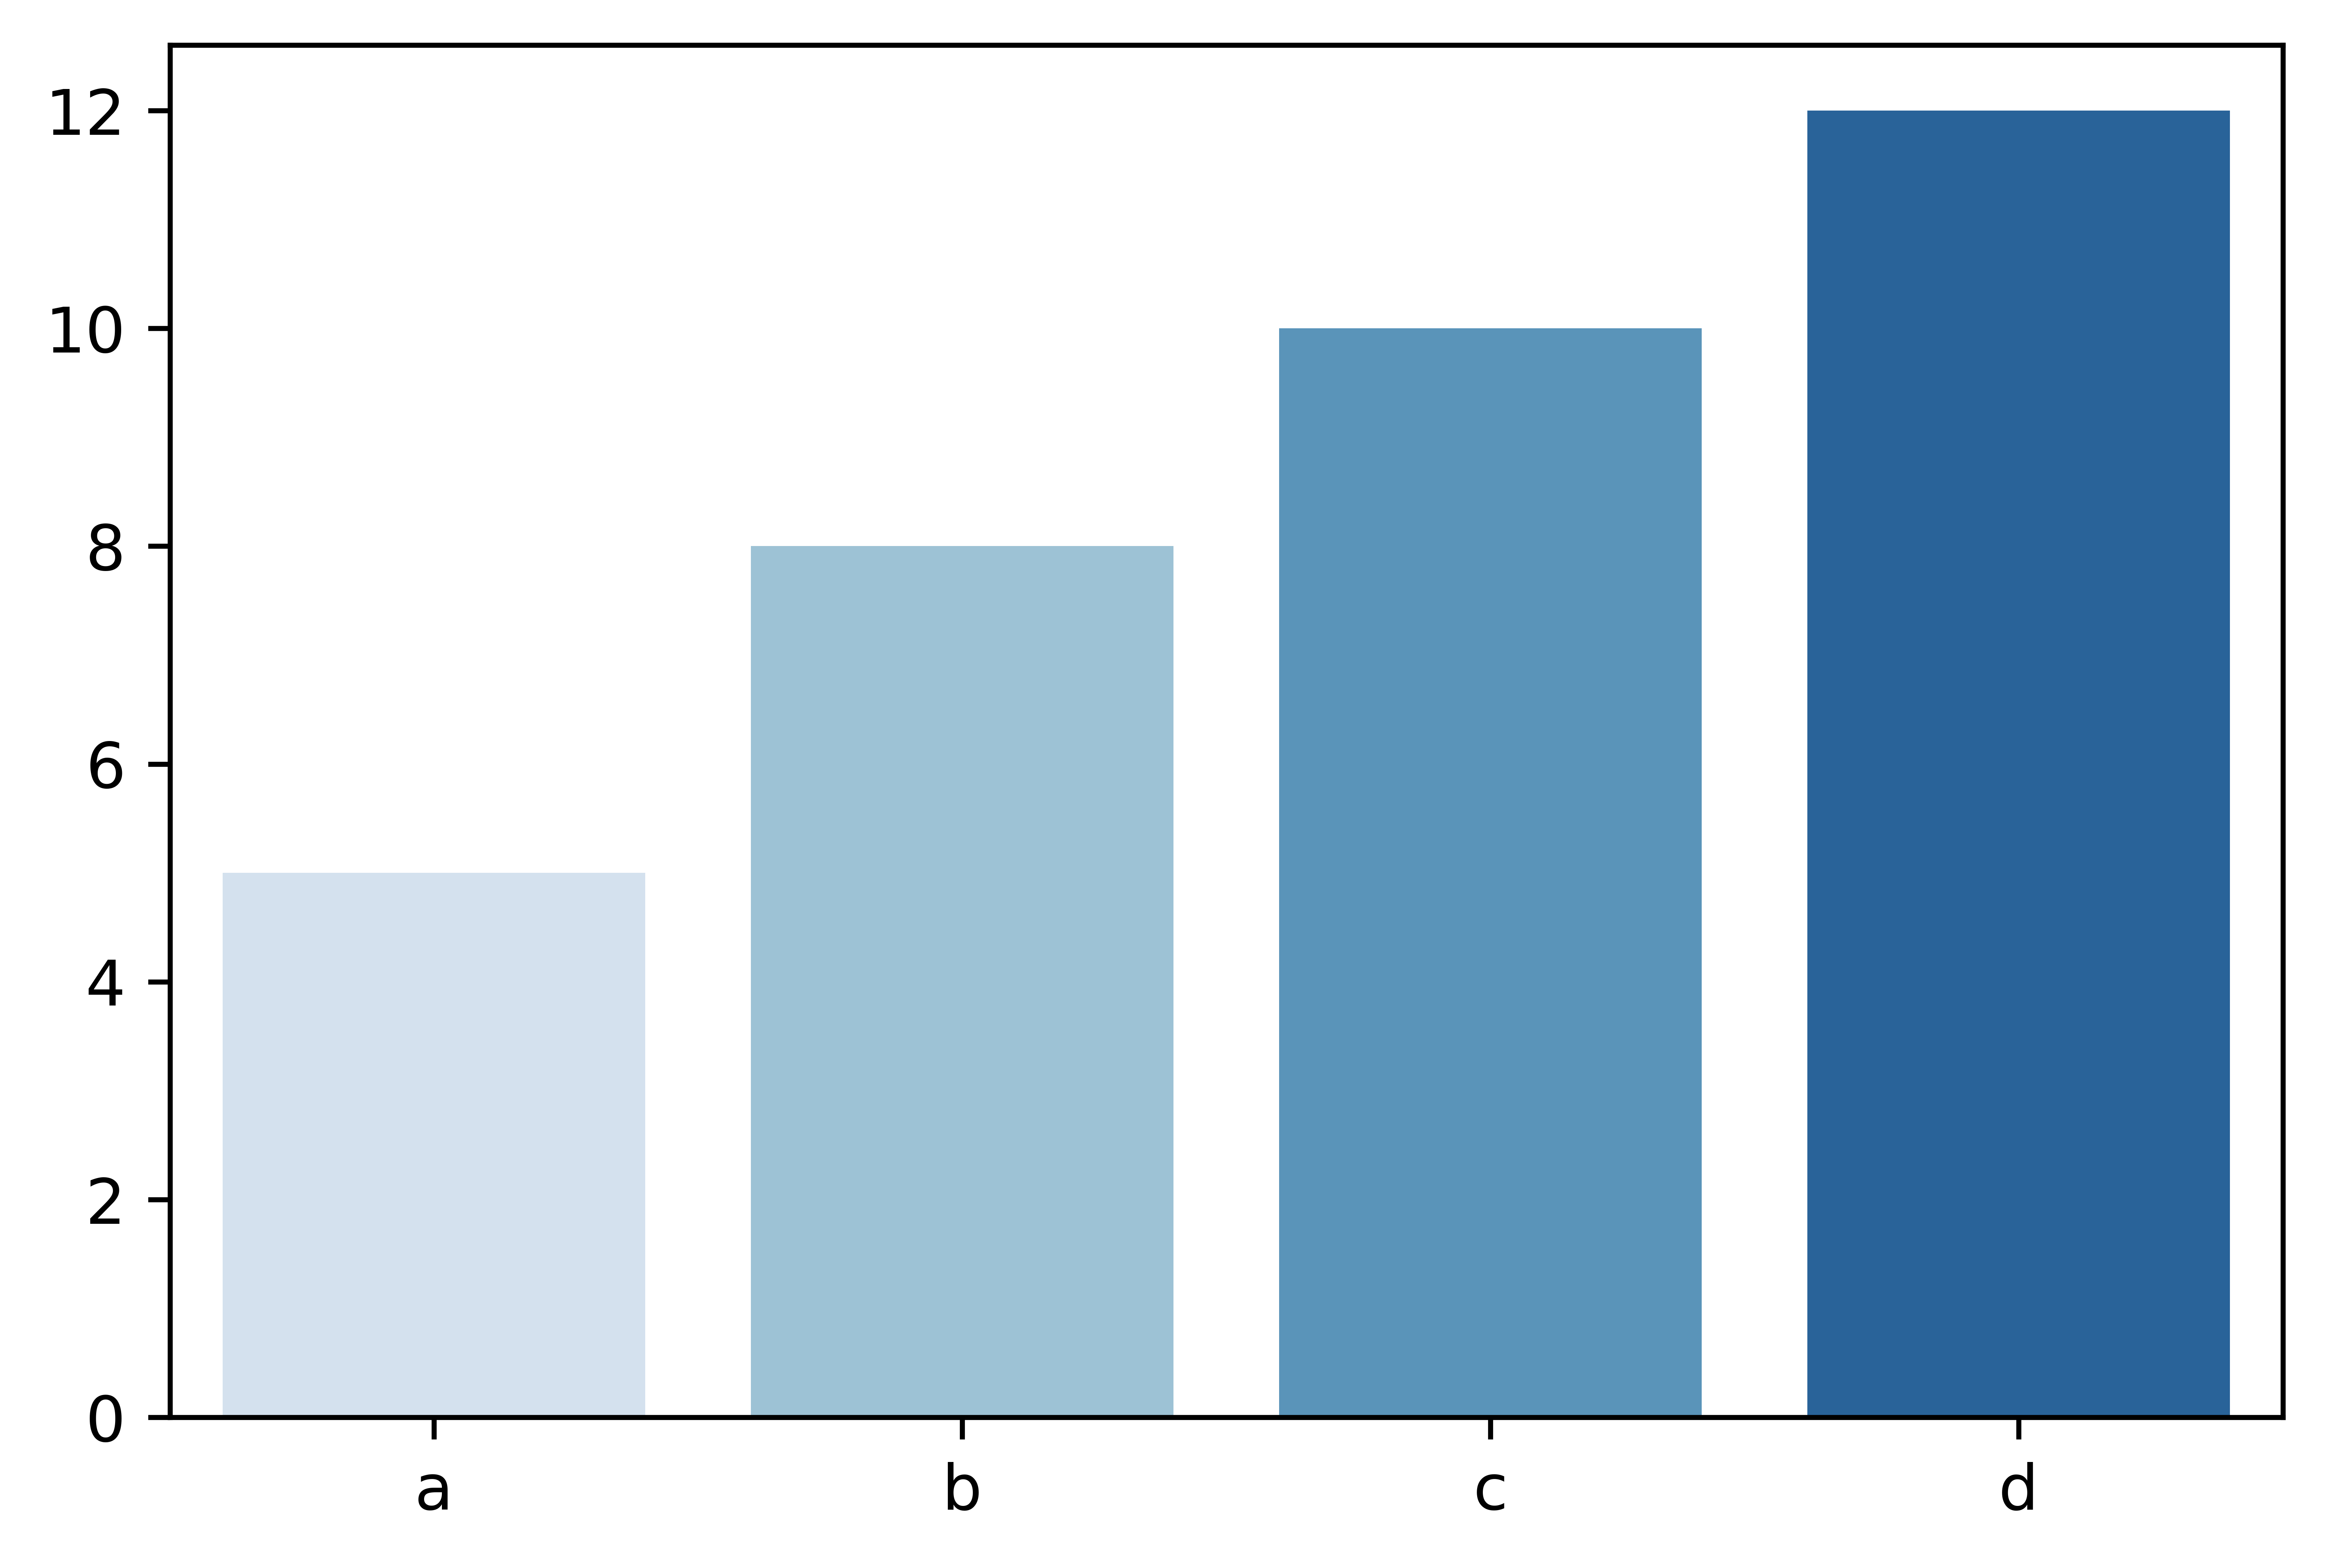

In [36]:
plt.figure(dpi=1200) 
xval = ['a', 'b', 'c', 'd']
yval = [ 5, 8, 10, 12]
sns.barplot(x=xval,y=yval, palette="Blues")

By default, seaborn assigns a different color to each bar, which seems to invent a new data dimension. This coloring should be avoided.  
Let's turn it off:

<AxesSubplot:>

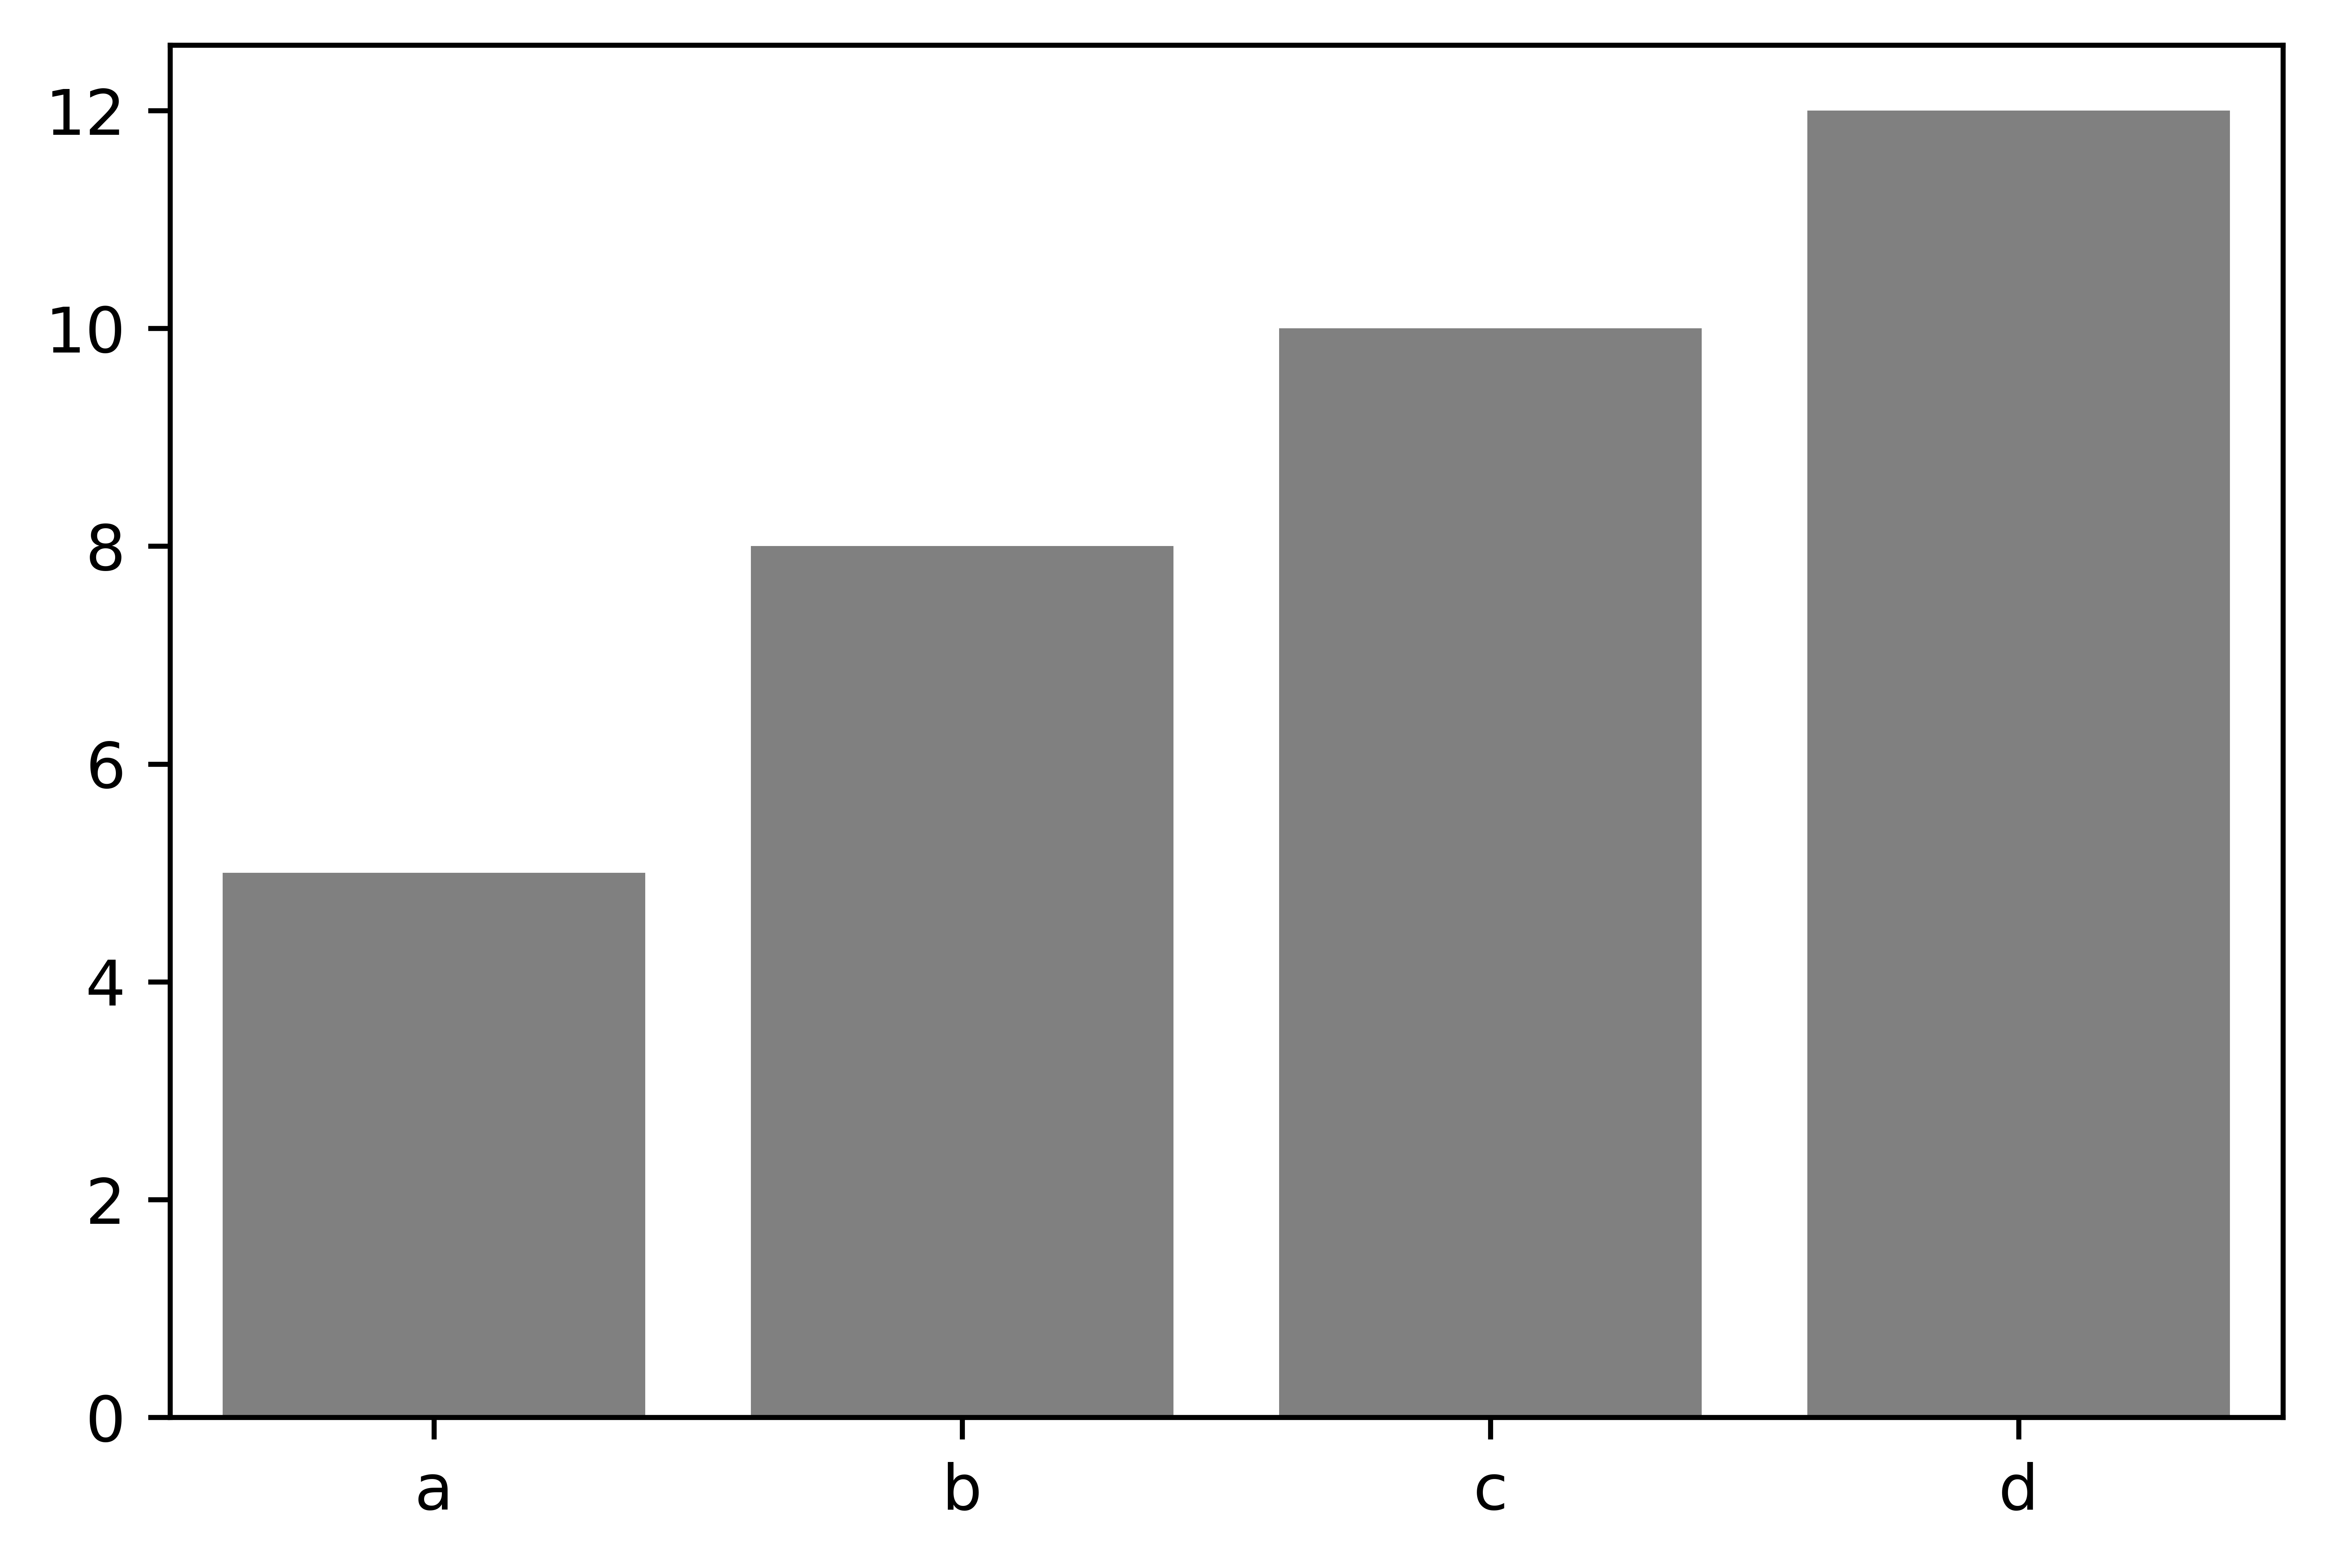

In [37]:
plt.figure(dpi=1200) 
xval = ['a', 'b', 'c', 'd']
yval = [ 5, 8, 10, 12]
sns.barplot(x=xval,y=yval, color='grey')

Showing partial time periods is misleading. The last point here is a half year. This should be called out for clarity.

<AxesSubplot:>

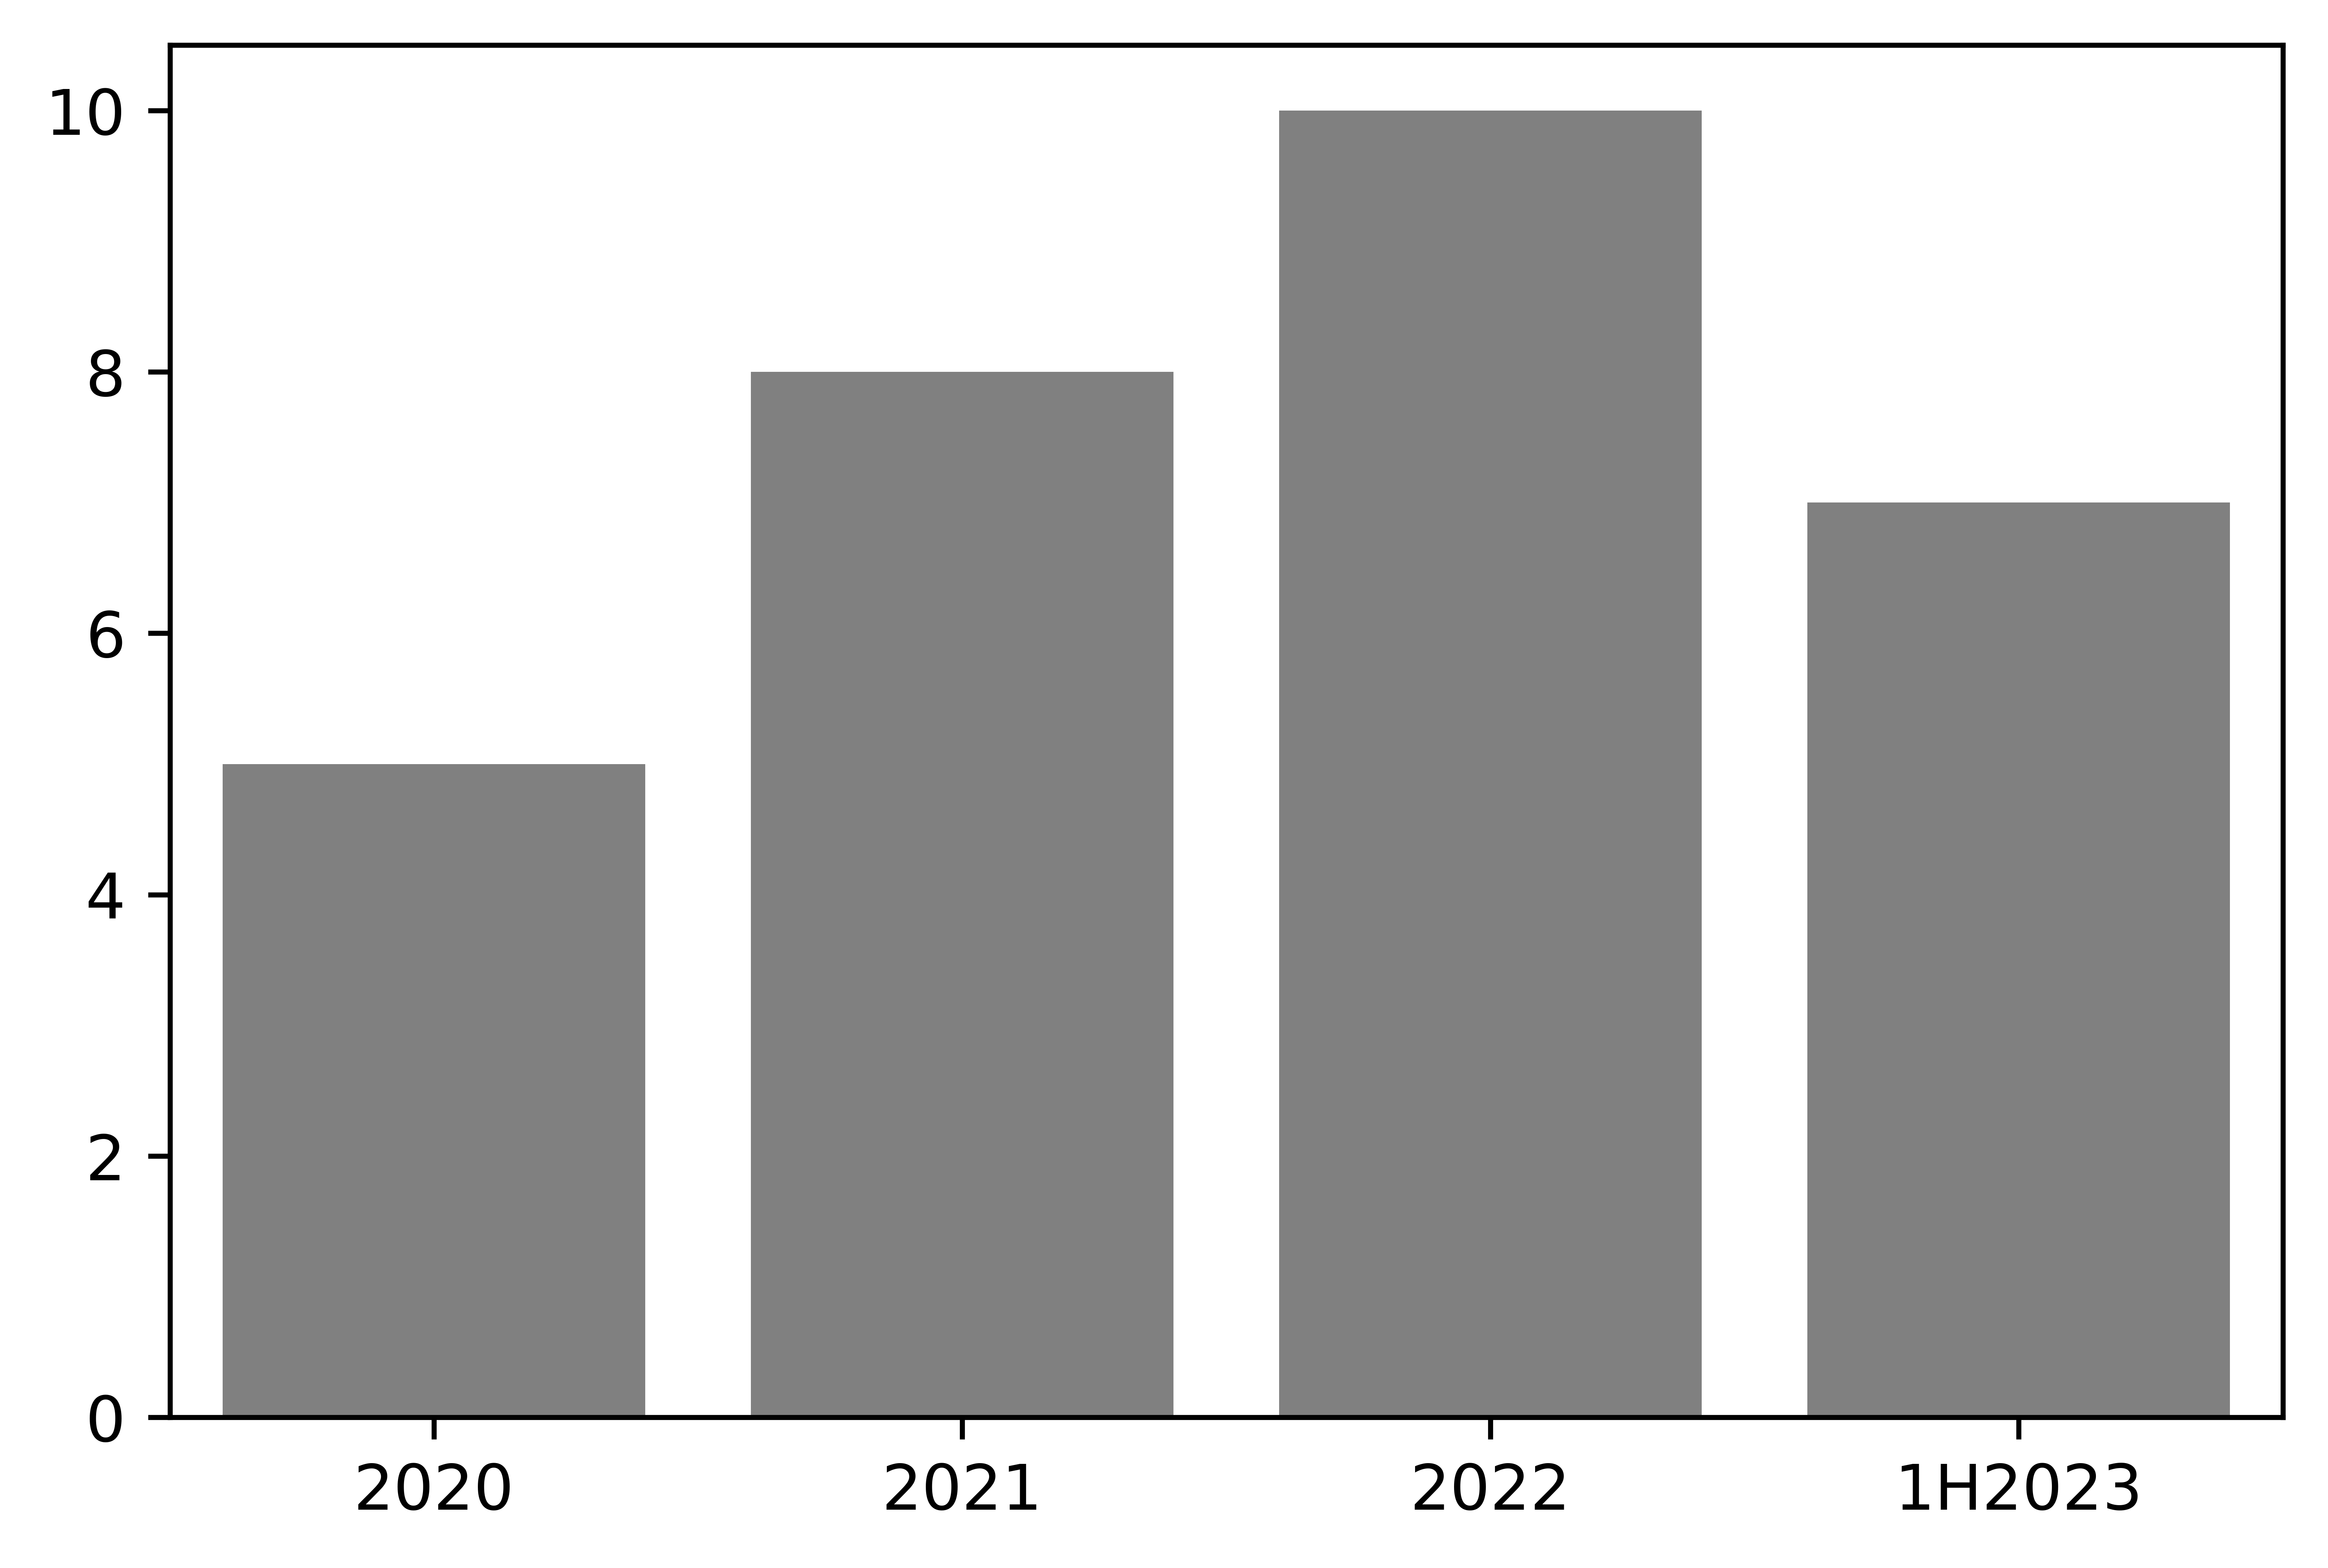

In [6]:
plt.figure(dpi=1200) 
year = ['2020', '2021', '2022', '1H2023']
revenue = [ 5, 8, 10, 7]
sns.barplot(x=year, y=revenue, color='grey')

### Pie charts are notoriously difficult for people to comprehend, yet they are very popular.

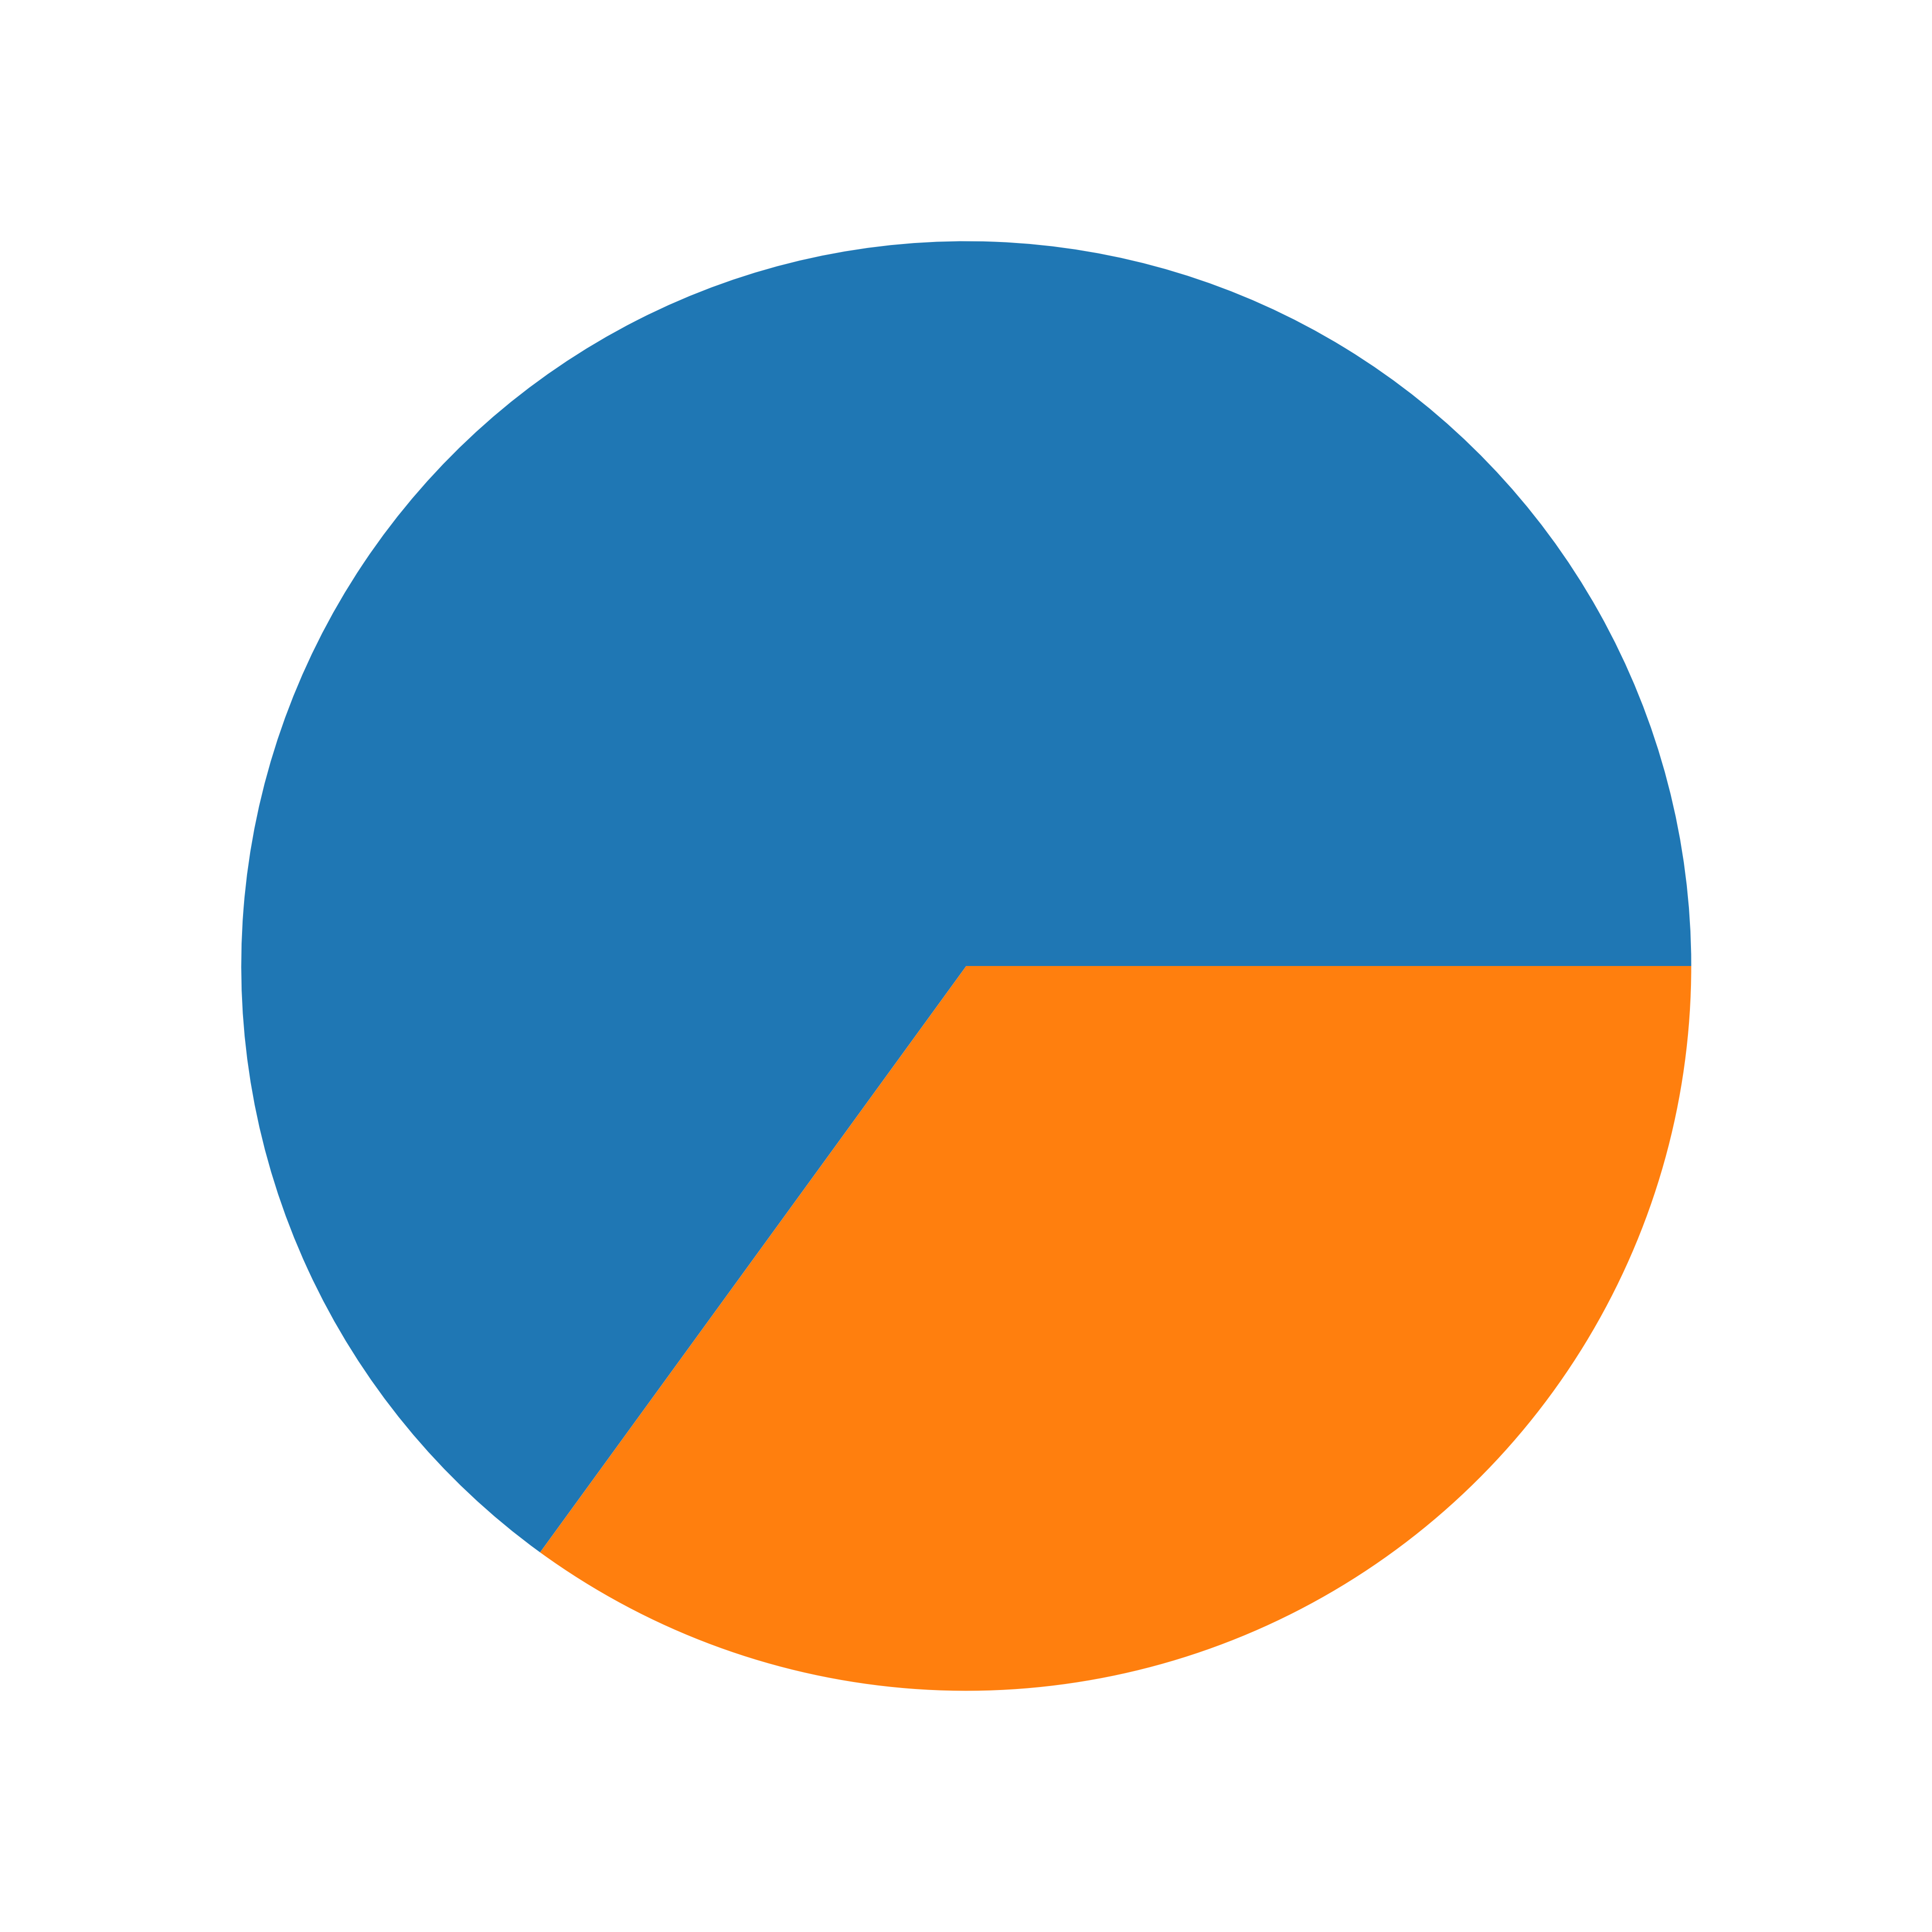

In [2]:
plt.figure(dpi=1200) 
vals = [.65, .35]
plt.pie(vals)
plt.show()